In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.express as px

In [2]:
# Assign URL and create GET request
url = 'https://www.bls.gov/web/laus/laumstrk.htm'
req = requests.get(url)

# Scrape and identify table
soup = BeautifulSoup(req.content, 'lxml')
table = soup.find_all('table')

# Use Pandas to clean up table and create DataFrame
df = pd.read_html(str(table))[0]

display(df)

,State,December 2020rate,Rank
0,South Dakota,3.3,1
1,Utah,3.3,1
2,Nebraska,3.4,3
3,Vermont,3.5,4
4,Iowa,3.7,5
5,Idaho,3.8,6
6,New Hampshire,3.8,6
7,Wisconsin,4.0,8
8,Montana,4.2,9
9,Missouri,4.4,10


In [3]:
# Drop last 2 rows by index since they contain inadverdent leftovers from scrape
df = df.drop([df.index[51], df.index[52]])

# Drop 'Rank' column since it is unnecessary for choropleth map
df = df.drop('Rank', 1)

# Rename the rate column based on column index to 'Current Unemployment Rate' since it will always be the latest read
df = df.rename(columns={df.columns[1]:'Current Unemployment Rate'})

# Convert the unemployment rate column to float
df['Current Unemployment Rate'] = df['Current Unemployment Rate'].astype(str).astype(float)

display(df)

,State,Current Unemployment Rate
0,South Dakota,3.3
1,Utah,3.3
2,Nebraska,3.4
3,Vermont,3.5
4,Iowa,3.7
5,Idaho,3.8
6,New Hampshire,3.8
7,Wisconsin,4.0
8,Montana,4.2
9,Missouri,4.4


In [4]:
# Dictionary to convert States to 2 letter postal codes for Plotly
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virgin Islands': 'VI',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [5]:
# Apply abbreviation change to 'State' column and create new postal 'Code' column
df['Code'] = df['State'].map(code)

display(df)

,State,Current Unemployment Rate,Code
0,South Dakota,3.3,SD
1,Utah,3.3,UT
2,Nebraska,3.4,NE
3,Vermont,3.5,VT
4,Iowa,3.7,IA
5,Idaho,3.8,ID
6,New Hampshire,3.8,NH
7,Wisconsin,4.0,WI
8,Montana,4.2,MT
9,Missouri,4.4,MO


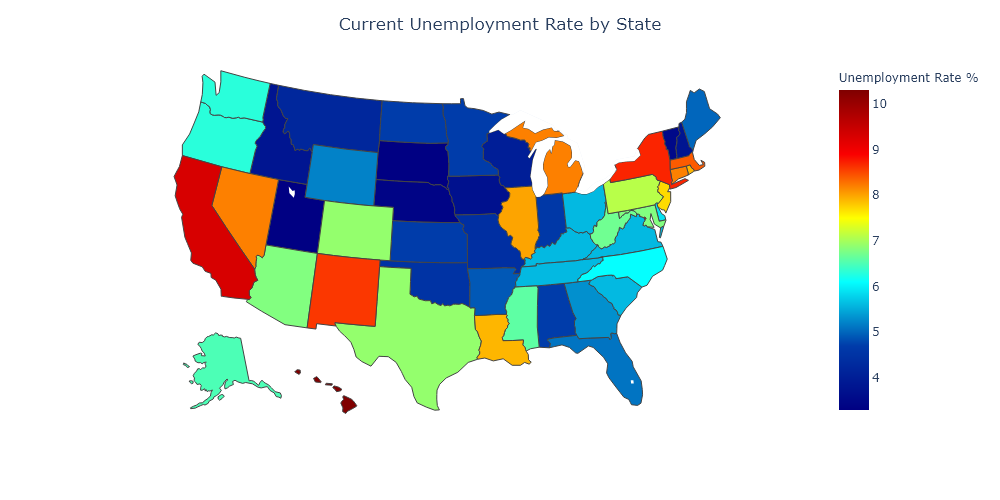

In [6]:
# Create choropleth map using plotly.express
fig = px.choropleth(df,
                    locations='Code',
                    color='Current Unemployment Rate',
                    color_continuous_scale='jet',
                    hover_name='State',
                    locationmode='USA-states',
                    labels={'Current Unemployment Rate':'Unemployment Rate %'})

fig.update_layout(
    title={'text':'Current Unemployment Rate by State',
           'xanchor':'center',
           'x':0.5},           
    geo_scope='usa')

# Use static renderer if interactive map is not desired
fig.show(renderer='png', height=500, width=1000)